In [ ]:
# !pip install tensorflow gym_anytrading gymnasium stable-baselines3



In [2]:
# Gym stuff
import gymnasium as gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize
from stable_baselines3 import A2C
from stable_baselines3 import DQN
from stable_baselines3 import PPO

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("C:/Users/minh1/Desktop/Study/Ki 8/REL/code/asg2/avg.csv")

In [4]:
df_reversed = df.iloc[::-1]
df_reversed.head()

,Date,Volume,Open,Close,High,Low
2591,1/30/2014,1198900,54.820000,55.049999,55.270000,54.090000
2590,1/31/2014,1578400,53.830002,54.639999,55.290001,53.830002
2589,2/3/2014,1142100,54.799999,53.259998,55.169998,52.959999
2588,2/4/2014,1348700,53.509998,54.009998,54.160000,53.099998
2587,2/5/2014,901700,53.720001,53.980000,54.730000,53.189999


In [5]:
# df['Date'] = pd.to_datetime(df['Date'])
df_reversed['Date'] = pd.to_datetime(df['Date'])

In [6]:
# df.dtypes
df_reversed.dtypes

Date      datetime64[ns]
Volume             int64
Open             float64
Close            float64
High             float64
Low              float64
dtype: object

In [7]:
# df.set_index('Date', inplace=True)
# df.head()
df_reversed.set_index('Date', inplace=True)
df_reversed.head()

,Volume,Open,Close,High,Low
Date,,,,,
2014-01-30,1198900,54.820000,55.049999,55.270000,54.090000
2014-01-31,1578400,53.830002,54.639999,55.290001,53.830002
2014-02-03,1142100,54.799999,53.259998,55.169998,52.959999
2014-02-04,1348700,53.509998,54.009998,54.160000,53.099998
2014-02-05,901700,53.720001,53.980000,54.730000,53.189999


<Axes: xlabel='Date'>

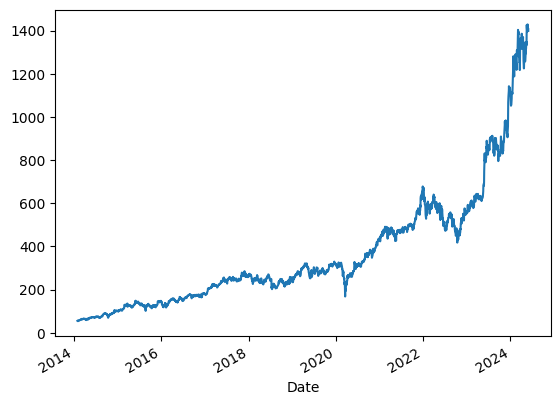

In [8]:
df_reversed['Open'].plot()

In [9]:
df_100_200 = df.iloc[2200:2250]
print(df_100_200)

           Date   Volume        Open       Close        High         Low
2200  8/19/2015  3089100  121.580002  121.449997  122.779999  119.300003
2201  8/18/2015  1950200  125.769997  122.239998  125.769997  121.779999
2202  8/17/2015  2129300  121.320000  125.519997  125.519997  120.800003
2203  8/14/2015  2649600  124.000000  121.959999  124.500000  121.169998
2204  8/13/2015  1457100  125.620003  124.190002  126.820000  124.010002
2205  8/12/2015  2720500  121.589996  125.730003  126.680000  120.620003
2206  8/11/2015  2667300  125.639999  124.209999  126.230003  122.919998
2207  8/10/2015  2890700  123.489998  127.279999  127.400002  123.000000
2208   8/7/2015  3052700  121.019997  122.550003  123.980003  120.820000
2209   8/6/2015  4605200  125.040001  123.269997  125.400002  120.599998
2210   8/5/2015  3415800  123.000000  124.750000  125.690002  121.000000
2211   8/4/2015  4746700  125.550003  123.470001  125.550003  118.760002
2212   8/3/2015  2727300  126.419998  125.800003  1

In [9]:
print(len(df))

2592


In [10]:
env = gym.make('stocks-v0', df=df_reversed, frame_bound=(5,2226), window_size=5)

In [11]:
env.signal_features

C:\Users\minh1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.signal_features to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.signal_features` for environment variables or `env.get_wrapper_attr('signal_features')` that will search the reminding wrappers.
  logger.warn(


array([[ 5.505000e+01,  0.000000e+00],
       [ 5.464000e+01, -4.100000e-01],
       [ 5.326000e+01, -1.380001e+00],
       ...,
       [ 5.310800e+02,  1.258000e+01],
       [ 5.447200e+02,  1.364000e+01],
       [ 5.566300e+02,  1.191000e+01]], dtype=float32)

info {'total_reward': 476.2681465148926, 'total_profit': 1150717.3100430989, 'position': <Positions.Short: 0>}


C:\Users\minh1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gymnasium\core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


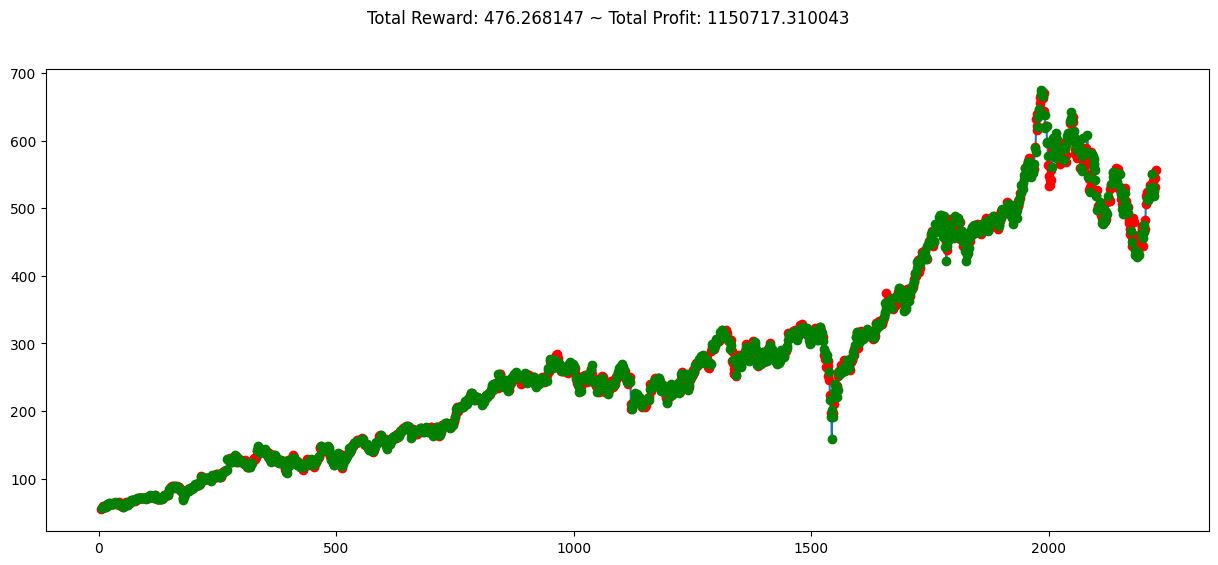

In [12]:
state = env.reset()

while True:
    action = env.action_space.sample()
    n_state, reward, terminated,truncated, info = env.step(action)
    done = terminated or truncated
    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [13]:
env_maker = lambda: gym.make('stocks-v0', df=df_reversed, frame_bound=(5,2591), window_size = 5)
env = DummyVecEnv([env_maker])

In [22]:

model = A2C("MlpPolicy", env, verbose=1)
# model.load('a2c_trade')
model.learn(total_timesteps=100000)
# model.save("a2c_trade")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| time/                 |          |
|    fps                | 615      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0.000396 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.469    |
|    value_loss         | 2.75     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 604       |
|    iterations         | 200       |
|    time_elapsed       | 1         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -0.693    |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_u

In [69]:
model.save("a2c_trade")

In [45]:
env = gym.make('stocks-v0', df=df_reversed, frame_bound=(5,2591), window_size=5)
observation, info = env.reset()
while True: 
    action, _states = model.predict(observation)
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # env.render()
    if done:
        print("info", info)
        break

info {'total_reward': 1165.9886360168457, 'total_profit': 1606751.007727984, 'position': <Positions.Short: 0>}


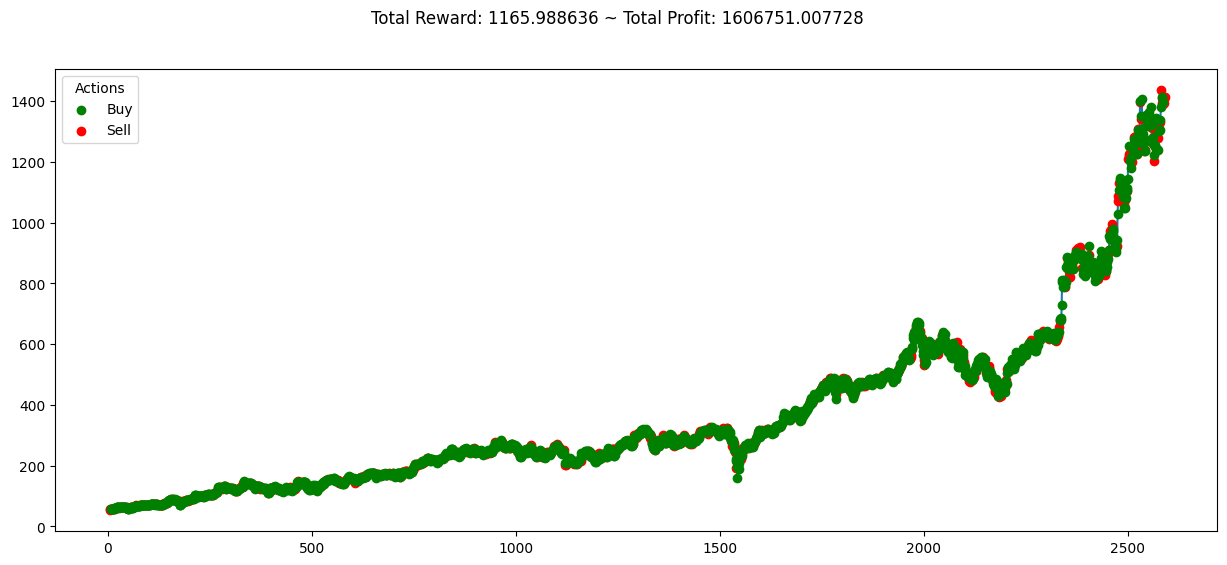

In [46]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.scatter([], [], color='green', label='Buy')
plt.scatter([], [], color='red', label='Sell')
plt.legend(title='Actions', loc='upper left')
plt.show()

In [27]:
print("env information:")
print("> shape:", env.unwrapped.shape)
print("> df.shape:", env.unwrapped.df.shape)
print("> prices.shape:", env.unwrapped.prices.shape)
print("> signal_features.shape:", env.unwrapped.signal_features.shape)
print("> max_possible_profit:", env.unwrapped.max_possible_profit())

env information:
> shape: (5, 2)
> df.shape: (2592, 5)
> prices.shape: (2591,)
> signal_features.shape: (2591, 2)
> max_possible_profit: 240588698761750.8


In [68]:
env = gym.make('stocks-v0', df=df_reversed, frame_bound=(2227,2591), window_size=5)
observation, info = env.reset()
while True: 
    action, _states = model.predict(observation)
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    # env.render()
    if done:
        print("info", info)
        break
    

info {'total_reward': 648.6401977539062, 'total_profit': 206099.2033173284, 'position': <Positions.Long: 1>}


In [80]:
env = gym.make('stocks-v0', df=df_reversed, frame_bound=(2227,2591), window_size=5) # Total number of timesteps to train
num_episodes = 100

top_episodes = []

for e in range(num_episodes):
    observation, info = env.reset()
    total_reward = 0
    while True:
        action, _states = model.predict(observation)
        observation, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward
        # env.render()
        if done:
            # print("info", info)
            # print("Episode:", e, "Info:", info)  # Print the entire info dictionary for inspection
            top_episodes.append((e, total_reward, info))
            break
top_episodes = sorted(top_episodes, key=lambda x: x[2]['total_profit'], reverse=True)[:10]
print("\nTop 10 episodes based on total profit:")
for episode in top_episodes:
    episode_num, total_reward, info = episode
    print(f'Episode: {episode_num}, Total Reward: {total_reward}, Total Profit: {info["total_profit"]}')

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------
| time/              |     |
|    fps             | 770 |
|    iterations      | 1   |
|    time_elapsed    | 0   |
|    total_timesteps | 5   |
----------------------------
------------------------------------
| time/                 |          |
|    fps                | 631      |
|    iterations         | 2        |
|    time_elapsed       | 0        |
|    total_timesteps    | 10       |
| train/                |          |
|    entropy_loss       | -0.693   |
|    explained_variance | -0.171   |
|    learning_rate      | 0.0007   |
|    n_updates          | 1        |
|    policy_loss        | -0.0507  |
|    value_loss         | 0.0213   |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 685      |
|    iterations         | 3        |
|    time_elapsed       | 0        |


ValueError: could not broadcast input array from shape (4,2) into shape (5,2)